In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\asus\Downloads\archive (2)\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"C:\Users\asus\Downloads\archive (2)\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [11]:
y_train.shape

(111, 2)

In [12]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 5s 1s/step - loss: 30.5994 - val_loss: 57.1806
Epoch 2/30
3/3 [==============================] - 3s 1s/step - loss: 11.4757 - val_loss: 93.1594
Epoch 3/30
3/3 [==============================] - 3s 984ms/step - loss: 6.9792 - val_loss: 17.6815
Epoch 4/30
3/3 [==============================] - 3s 1s/step - loss: 6.4100 - val_loss: 16.1970
Epoch 5/30
3/3 [==============================] - 3s 987ms/step - loss: 2.1210 - val_loss: 23.5137
Epoch 6/30
3/3 [==============================] - 3s 970ms/step - loss: 1.7094 - val_loss: 27.3984
Epoch 7/30
3/3 [==============================] - 3s 993ms/step - loss: 1.3633 - val_loss: 25.0941
Epoch 8/30
3/3 [==============================] - 3s 973ms/step - loss: 0.9844 - val_loss: 21.8059
Epoch 9/30
3/3 [==============================] - 3s 981ms/step - loss: 1.6889 - val_loss: 16.8013
Epoch 10/30
3/3 [==============================] - 3s 976ms/step - loss: 0.5548 - val_loss: 13.7560
Epoch 11/30
3/3 

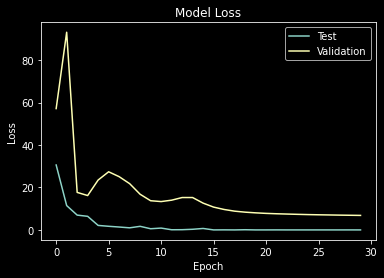

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [14]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is Its a Tumor


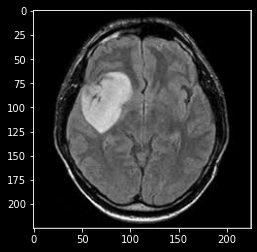

In [22]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\asus\Downloads\archive (2)\yes\Y4.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is No, Its not a tumor


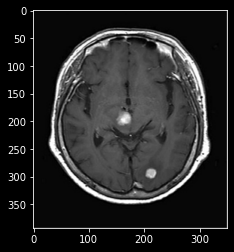

In [20]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\asus\Downloads\archive (2)\no\N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

In [17]:
model.save("BrainTumorModel.h5")

In [18]:
pip install flask

Note: you may need to restart the kernel to use updated packages.
